In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [80]:
df1 = pd.read_csv('TATAMOTORS.NS.csv', index_col='Date', parse_dates=['Date']).copy()

In [81]:
df1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-14,310.000000,313.299988,308.649994,309.549988,309.549988,21863250.0
2021-07-15,310.500000,312.850006,307.600006,310.250000,310.250000,23617599.0
2021-07-16,311.100006,315.450012,310.500000,311.250000,311.250000,25148606.0
2021-07-19,308.950012,310.299988,306.000000,308.850006,308.850006,21346348.0
2021-07-20,307.000000,308.000000,301.049988,302.149994,302.149994,27645391.0


In [82]:
df1.shape

(252, 6)

In [83]:
# Check for  Missing Values
df1.isna().any()


Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [84]:
df =df1.dropna()

In [85]:
df.isna().any()



Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

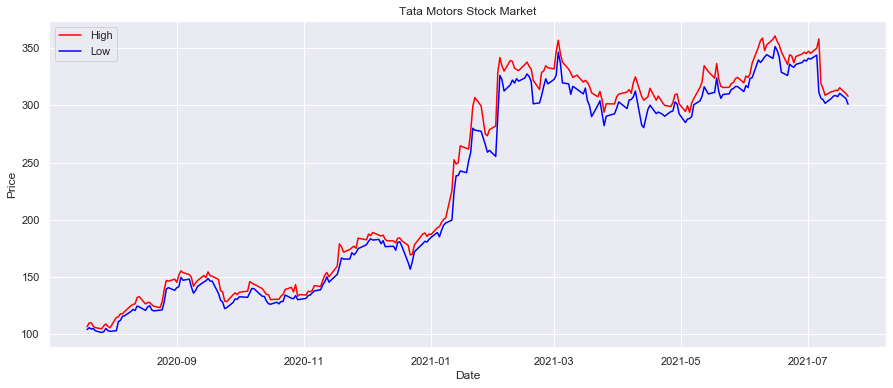

In [86]:
# Visualizing The Data(high ,low)
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))
plt.title("Tata Motors Stock Market")
plt.xlabel('Date')
plt.ylabel('Price')


plt.plot(df['High'], label='High', color='red')
plt.plot(df['Low'], label='Low', color='blue')


plt.legend()
plt.show()

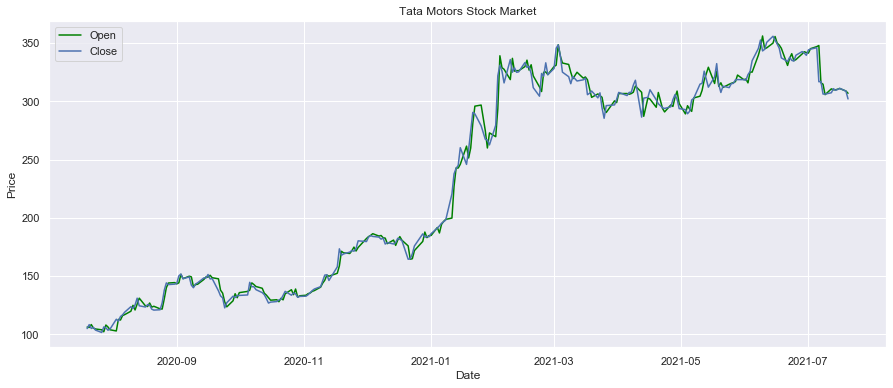

In [87]:
# Visualizing The Data (open, close)
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))
plt.title("Tata Motors Stock Market")
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(df['Open'], label='Open', color='green')
plt.plot(df['Close'], label='Close')

plt.legend()
plt.show()

In [88]:
# Splitting The Data Into Training & Testing
training_data = df.loc[df.index < '2021-01-14', ['Open', 'High', 'Low', 'Close', 'Volume']]
testing_data = df.loc[df.index >= '2021-01-14', ['Open', 'High', 'Low', 'Close', 'Volume']]

# training_data.shape
training_data_ = training_data[: training_data.shape[0]-10].copy()
training_data_

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-20,106.349998,106.349998,103.849998,105.050003,39786731.0
2020-07-21,106.000000,109.699997,105.500000,108.449997,66008143.0
2020-07-22,108.500000,109.750000,104.250000,105.150002,50735592.0
2020-07-23,105.449997,106.449997,104.699997,106.050003,30722413.0
2020-07-24,104.699997,105.500000,102.699997,103.750000,39363520.0
...,...,...,...,...,...
2020-12-23,165.000000,169.699997,163.399994,169.199997,56930071.0
2020-12-24,172.000000,178.000000,172.000000,175.949997,73831319.0
2020-12-28,179.850006,187.399994,179.000000,186.350006,98012135.0


In [89]:
# Normalizing The Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data_)

scaled_training_data

array([[0.04731303, 0.02194541, 0.03111647, 0.03957479, 0.07245691],
       [0.04322427, 0.06168442, 0.05125073, 0.0797401 , 0.2266601 ],
       [0.07242988, 0.06227758, 0.03599752, 0.04075611, 0.1368451 ],
       [0.036799  , 0.02313164, 0.04148864, 0.05138813, 0.01915136],
       [0.02803732, 0.0118624 , 0.01708351, 0.0242174 , 0.06996808],
       [0.01985978, 0.        , 0.        , 0.        , 0.01281255],
       [0.        , 0.03202843, 0.00854176, 0.0561134 , 0.21644524],
       [0.06775696, 0.05041518, 0.04331904, 0.04784409, 0.10053724],
       [0.04789719, 0.02669039, 0.01891391, 0.02303609, 0.03477037],
       [0.01985978, 0.01067618, 0.01220256, 0.03484944, 0.0373031 ],
       [0.00817754, 0.11743774, 0.01952409, 0.13408157, 0.98385698],
       [0.12441583, 0.12574137, 0.11592435, 0.11518014, 0.40248658],
       [0.11799065, 0.15599053, 0.13056739, 0.16184292, 0.42286108],
       [0.16238312, 0.15658359, 0.17327636, 0.17838162, 0.19187149],
       [0.17172895, 0.18030838, 0.

In [90]:
# Splitting The Data Into X_train, y_train
X_train = []
y_train = []

for i in range(10, scaled_training_data.shape[0]):
    X_train.append(scaled_training_data[i-10:i])
    y_train.append(scaled_training_data[i, 0])


In [91]:
# Converting List Into Numpy Array
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((104, 10, 5), (104,))

### Building The Model

In [ ]:
pip install tensorflow

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [93]:
# Initializing The RNN
model = Sequential()

# Adding rst LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

# Adding The Second LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding The Third LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding The Fourth LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding The Fifth LSTM Layer & Dropout
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding The Final Dense Layer & Dropout
model.add(Dense(units = 1))

In [94]:
# Compiting The Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
# Train The Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 10s 47ms/step - loss: 0.2911
Epoch 2/10
4/4 [==============================] - 0s 34ms/step - loss: 0.1560
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0501
Epoch 4/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0388
Epoch 5/10
4/4 [==============================] - 0s 30ms/step - loss: 0.0349
Epoch 6/10
4/4 [==============================] - 0s 35ms/step - loss: 0.0399
Epoch 7/10
4/4 [==============================] - 0s 31ms/step - loss: 0.0290
Epoch 8/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0249
Epoch 9/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0247
Epoch 10/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0207


### Preprocessing The Test Data

In [96]:
# Get The Last 60 Days Data From The Training Data
past_60_days_data = training_data.tail(60)
past_60_days_data

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-19,129.800003,130.399994,127.800003,128.250000,33157664.0
2020-10-20,128.100006,130.300003,126.349998,129.649994,27465829.0
2020-10-21,131.050003,133.100006,128.300003,130.250000,39252663.0
2020-10-22,129.699997,134.600006,128.449997,133.500000,48808592.0
2020-10-23,134.899994,138.899994,134.100006,137.000000,68711352.0
2020-10-26,138.399994,140.800003,131.250000,133.699997,88531579.0
2020-10-27,134.149994,136.750000,130.850006,135.649994,56856159.0
2020-10-28,139.000000,143.250000,133.500000,134.800003,152359338.0
2020-10-29,132.000000,133.000000,130.000000,131.899994,66632704.0


In [97]:
# Creating The New Test Data
new_testing_data = past_60_days_data.append(testing_data)
new_testing_data

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-19,129.800003,130.399994,127.800003,128.250000,33157664.0
2020-10-20,128.100006,130.300003,126.349998,129.649994,27465829.0
2020-10-21,131.050003,133.100006,128.300003,130.250000,39252663.0
2020-10-22,129.699997,134.600006,128.449997,133.500000,48808592.0
2020-10-23,134.899994,138.899994,134.100006,137.000000,68711352.0
...,...,...,...,...,...
2021-07-14,310.000000,313.299988,308.649994,309.549988,21863250.0
2021-07-15,310.500000,312.850006,307.600006,310.250000,23617599.0
2021-07-16,311.100006,315.450012,310.500000,311.250000,25148606.0


In [98]:
# Normalizing The Test Data
scaled_testing_data = scaler.transform(new_testing_data)
scaled_testing_data

array([[ 3.21261716e-01,  3.07235980e-01,  3.23367919e-01,
         3.13644420e-01,  3.34726112e-02],
       [ 3.01401936e-01,  3.06049847e-01,  3.05674142e-01,
         3.30183036e-01,  0.00000000e+00],
       [ 3.35864521e-01,  3.39264591e-01,  3.29469201e-01,
         3.37271116e-01,  6.93161540e-02],
       [ 3.20093422e-01,  3.57058184e-01,  3.31299512e-01,
         3.75664496e-01,  1.25512775e-01],
       [ 3.80841056e-01,  4.08066344e-01,  4.00244103e-01,
         4.17011214e-01,  2.42557164e-01],
       [ 4.21728911e-01,  4.30605002e-01,  3.65466725e-01,
         3.78027131e-01,  3.59116191e-01],
       [ 3.72079373e-01,  3.82562264e-01,  3.60585773e-01,
         4.01063123e-01,  1.72839003e-01],
       [ 4.28738328e-01,  4.59667837e-01,  3.92922492e-01,
         3.91021884e-01,  7.34475237e-01],
       [ 3.46962618e-01,  3.38078280e-01,  3.50213521e-01,
         3.56763069e-01,  2.30333026e-01],
       [ 3.60981276e-01,  3.55871873e-01,  3.53874327e-01,
         3.65623080e-01

In [99]:
# Splitting The Testing Data Into X_test, y_test
X_test = []
y_test = []

for i in range(10, scaled_testing_data.shape[0]):
    X_test.append(scaled_testing_data[i-10:i])
    y_test.append(scaled_testing_data[i, 0])

In [100]:
# Converting Lists Into Numpy Array
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape


((177, 10, 5), (177,))

In [101]:
# Evaluate The Model
loss = model.evaluate(X_test, y_test)

6/6 [==============================] - 2s 11ms/step - loss: 1.0562


### Make Prediction

In [102]:
# Predicting the open prices
predicted = model.predict(X_test)
# predicted

In [103]:
scaler.scale_


array([1.16822442e-02, 1.18623958e-02, 1.22025630e-02, 1.18133478e-02,
       5.88081193e-09])

In [104]:
# Rescaling The Data
scale = 1/1.16822442e-02
predicted = predicted * scale
y_test = y_test * scale

In [105]:
# Creating The New DataFrame With Predicted VS Actual Data
predicted_vs_actual = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted.flatten()})
predicted_vs_actual

,Actual,Predicted
0,31.349991,38.442097
1,32.699997,39.048355
2,33.300003,39.800663
3,34.699997,40.271915
4,35.349991,40.676880
...,...,...
172,207.699997,115.953766
173,208.199997,115.798332
174,208.800003,115.439316
175,206.650009,114.829330


### Visualizing The Predicted Data

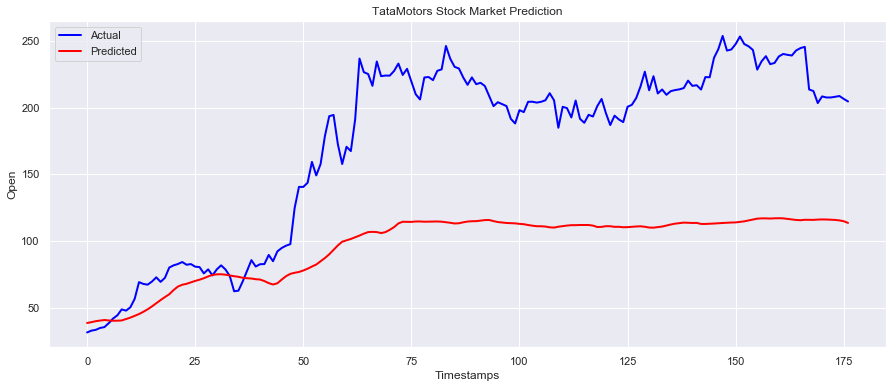

In [111]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))
plt.title("TataMotors Stock Market Prediction")
plt.xlabel('Timestamps')
plt.ylabel('Open')

plt.plot(predicted_vs_actual['Actual'], label='Actual', linewidth=2, color='blue')
plt.plot(predicted_vs_actual['Predicted'], label='Predicted', linewidth=2, color='red')

plt.legend()
plt.show()